In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columns on output 
pd.set_option('display.max_columns', 999) 

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_excel(r'D:\Nam3\HK2\DoAn2\DS-Customer Segmentation\Customer-Segmentation\data\online_retail_II.xlsx', sheet_name = 0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [99]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [100]:
df.describe(include="O" )

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [101]:
df[df['Customer ID'].isna()].head(10) 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [102]:
df[df['Quantity']<0].head(10) 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [103]:
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match('^\\d{6}$') == False ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [104]:
df['Invoice'].str.replace('[0-9]','', regex = True).unique()


array(['', 'C', 'A'], dtype=object)

In [105]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [106]:
df['StockCode'] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^\\d{5}$')== False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== False) ]['StockCode'].unique()



array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [107]:
df[df['StockCode'].str.contains('^DOT')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [108]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [117]:
cleaned_df = df.copy()


In [118]:
cleaned_df['Invoice'] = df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True 
    )

cleaned_df = cleaned_df[mask]

cleaned_df 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [121]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)
cleaned_df = cleaned_df[mask]

cleaned_df 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [122]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


In [ ]:
cleaned_df.dropna(subset = ['Customer ID'], inplace = True) 

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [125]:
cleaned_df[cleaned_df['Price'] == 0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [130]:
len(cleaned_df[cleaned_df['Price'] == 0]) 

0

In [128]:
cleaned_df = cleaned_df[cleaned_df['Price']>0 ]

In [129]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [131]:
cleaned_df['Price'].min()

0.001

In [132]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped about 23%

In [68]:
print(f"Initial shape: {df.shape}")

Initial shape: (525461, 8)


In [69]:
# Kiểm tra giá trị bị thiếu
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [170]:
# Tổng số CustomerID bị thiếu
missing_customerid = df['CustomerID'].isnull().sum()
print(f"Number of missing CustomerIDs: {missing_customerid}")

# Xóa các hàng bị thiếu giá trị CustomerID
df = df.dropna(subset=['CustomerID'])
print(f"Dataset shape after removing missing CustomerIDs: {df.shape}")

Number of missing CustomerIDs: 135080
Dataset shape after removing missing CustomerIDs: (406829, 8)


In [171]:
# Số lượng giao dịch có giá trị âm 
negative_quantity = df[df['Quantity'] < 0].shape[0]
print(f"Number of transactions with negative Quantity: {negative_quantity}")

# Loại bỏ giá trị âm (đơn hủy)
df = df[df['Quantity'] >= 0]
print(f"Dataset shape after removing negative quantities: {df.shape}")

Number of transactions with negative Quantity: 8905
Dataset shape after removing negative quantities: (397924, 8)


In [172]:
# Định dạng lại cột InvoiceDate giá trị ngày/giờ 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Chuyển đổi giá trị CustomerID thành số nguyên 
df['CustomerID'] = df['CustomerID'].astype(int)

In [173]:
#Tính tông giá trị đơn hàng (chi tiêu) = số lương * giá sản phẩm
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

print(f'Cleaned shape: {df.shape}')

Cleaned shape: (397924, 9)


In [174]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [175]:
# Tính tổng doanh thu 
total_sales = df['TotalSpend'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $8,911,407.90


In [176]:
# Ngày tham chiếu: 1 ngày sau ngày lập hoá đơn cuối cùng
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Ngày tham chiếu cho lần mua gần nhất : {reference_date.date()}")

# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSpend': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.head())

Ngày tham chiếu cho lần mua gần nhất : 2011-12-10
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


In [177]:
# Tính các mốc phần trăm 20%, 40%, 60%, 80%
rfm_quantiles = {
    'Recency': rfm['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).tolist(),
    'Frequency': rfm['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).tolist(),
    'Monetary': rfm['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()
}

rfm_quantiles

{'Recency': [13.600000000000023, 33.0, 72.0, 179.0],
 'Frequency': [1.0, 2.0, 3.0, 6.0],
 'Monetary': [250.106, 489.72400000000005, 941.9419999999996, 2057.914]}

In [178]:
# Tính các giá trị phân vị (quantiles) cho R, F, M
rfm_quantiles = rfm.quantile([0.2, 0.4, 0.6, 0.8])

# Hàm gán điểm Recency (nhỏ hơn là tốt hơn)
def assign_r_score(value):
    if value <= rfm_quantiles['Recency'][0.2]:
        return 5
    elif value <= rfm_quantiles['Recency'][0.4]:
        return 4
    elif value <= rfm_quantiles['Recency'][0.6]:
        return 3
    elif value <= rfm_quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

# Hàm gán điểm Frequency & Monetary (lớn hơn là tốt hơn)
def assign_fm_score(value, column):
    if value <= rfm_quantiles[column][0.2]:
        return 1
    elif value <= rfm_quantiles[column][0.4]:
        return 2
    elif value <= rfm_quantiles[column][0.6]:
        return 3
    elif value <= rfm_quantiles[column][0.8]:
        return 4
    else:
        return 5

# Áp dụng gán điểm cho từng khách hàng
rfm['R'] = rfm['Recency'].apply(assign_r_score)
rfm['F'] = rfm['Frequency'].apply(lambda x: assign_fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: assign_fm_score(x, 'Monetary'))

# Tạo cột RFM_Concat
rfm['RFM_Concat'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Hàm phân nhóm khách hàng theo R & F
def assign_segment(r, f):
    if (r >= 4 and f >= 4):
        return "Champions"
    elif (r >= 3 and f >= 4):
        return "Loyal Customers"
    elif (r >= 4 and f >= 2):
        return "Potential Loyalist"
    elif (r == 5 and f == 1):
        return "New Customers"
    elif (r == 4 and f == 1):
        return "Promising"
    elif (r == 3 and f == 3):
        return "Needing Attention"
    elif (r == 3 and f <= 2):
        return "About to Sleep"
    elif (r <= 2 and f >= 3):
        return "At Risk"
    elif (r <= 2 and f == 5):
        return "Can't Lose Them"
    elif (r <= 2 and f <= 2):
        return "Hibernating"
    else:
        return "Other"

# Gán nhãn phân nhóm
rfm['Segment'] = rfm.apply(lambda row: assign_segment(row['R'], row['F']), axis=1)

# Hiển thị kết quả
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Concat', 'Segment']]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment
0,12346,326,1,77183.60,1,1,5,115,Hibernating
1,12347,2,7,4310.00,5,5,5,555,Champions
2,12348,75,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Promising
4,12350,310,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...,...
4334,18280,278,1,180.60,1,1,1,111,Hibernating
4335,18281,181,1,80.82,1,1,1,111,Hibernating
4336,18282,8,2,178.05,5,2,1,521,Potential Loyalist
4337,18283,4,16,2094.88,5,5,5,555,Champions


In [179]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment
0,12346,326,1,77183.60,1,1,5,115,Hibernating
1,12347,2,7,4310.00,5,5,5,555,Champions
2,12348,75,4,1797.24,2,4,4,244,At Risk
3,12349,19,1,1757.55,4,1,4,414,Promising
4,12350,310,1,334.40,1,1,2,112,Hibernating


In [180]:
#Số lượng khách hàng trong từng nhóm
rfm_summary = rfm['Segment'].value_counts().reset_index()
rfm_summary.columns = ['Segment', 'Count']
print(rfm_summary)

              Segment  Count
0         Hibernating   1325
1           Champions   1035
2  Potential Loyalist    495
3      About to Sleep    476
4             At Risk    383
5     Loyal Customers    264
6           Promising    176
7   Needing Attention    118
8       New Customers     67


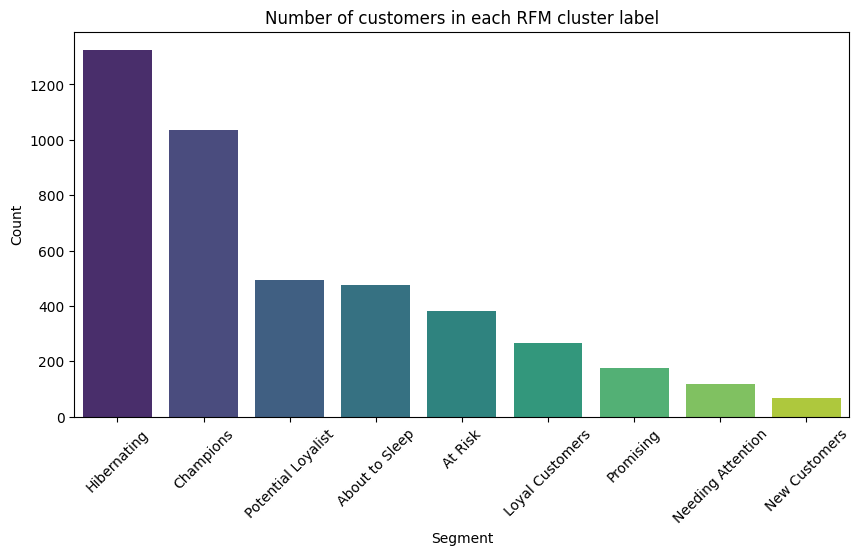

In [ ]:
# Đếm số lượng khách hàng trong từng nhóm
rfm_summary = rfm['Segment'].value_counts().reset_index()
rfm_summary.columns = ['Segment', 'Count']

#Vẽ biểu đồ thể hiện trực quan
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Count', data=rfm_summary, palette="viridis")

plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Number of customers in each RFM cluster label")

plt.xticks(rotation=45)
plt.show()

In [182]:
# Lọc nhóm khách hàng 'Promising'
promising_df = rfm[rfm['Segment'] == 'Hibernating']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID      Recency    Frequency      Monetary
count   1325.000000  1325.000000  1325.000000   1325.000000
mean   15276.597736   209.600755     1.277736    511.718945
std     1742.762203    89.697813     0.448052   2186.609558
min    12346.000000    73.000000     1.000000      3.750000
25%    13740.000000   131.000000     1.000000    168.400000
50%    15258.000000   208.000000     1.000000    310.050000
75%    16756.000000   280.000000     2.000000    540.450000
max    18281.000000   374.000000     2.000000  77183.600000


In [183]:
# Lọc nhóm khách hàng 'Champions'
promising_df = rfm[rfm['Segment'] == 'Champions']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID      Recency    Frequency       Monetary
count   1035.000000  1035.000000  1035.000000    1035.000000
mean   15200.164251    12.797101    10.690821    5612.846474
std     1724.834481     9.414452    13.399640   16600.939191
min    12347.000000     1.000000     4.000000     201.120000
25%    13755.500000     4.000000     5.000000    1421.845000
50%    15058.000000    11.000000     7.000000    2473.370000
75%    16756.000000    19.000000    12.000000    4531.605000
max    18283.000000    33.000000   210.000000  280206.020000


In [184]:
# Lọc nhóm khách hàng 'New Customers'
promising_df = rfm[rfm['Segment'] == 'New Customers']

# Hiển thị thống kê mô tả
print(promising_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].describe())

         CustomerID    Recency  Frequency     Monetary
count     67.000000  67.000000       67.0    67.000000
mean   15102.328358   7.089552        1.0   348.637612
std     1804.101710   3.604422        0.0   477.750975
min    12367.000000   1.000000        1.0    41.990000
25%    13432.000000   4.000000        1.0   168.765000
50%    15148.000000   7.000000        1.0   246.300000
75%    16552.000000  11.000000        1.0   360.810000
max    18174.000000  12.000000        1.0  3861.000000


K-Mean

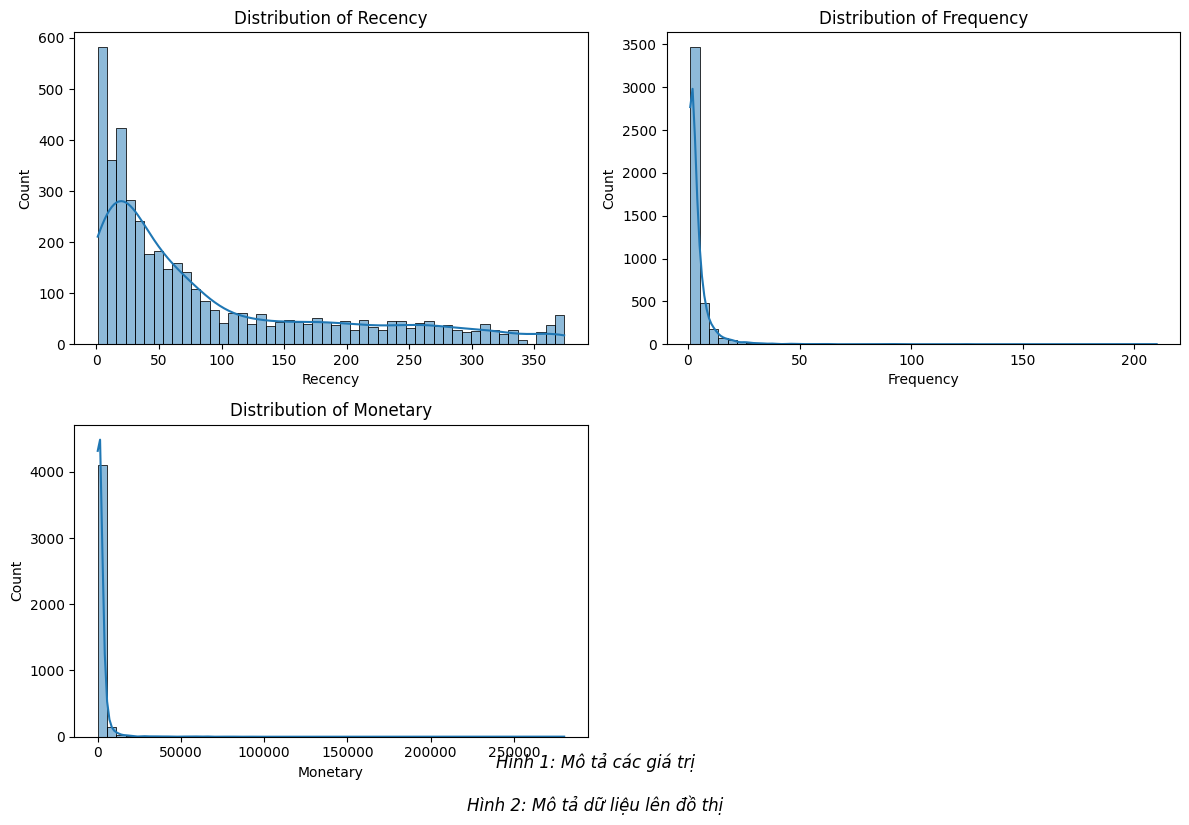

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure với kích thước 3 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Biểu đồ phân phối của Recency
sns.histplot(rfm['Recency'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Recency")

# Biểu đồ phân phối của Frequency
sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Frequency")

# Biểu đồ phân phối của Monetary
sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Monetary")

# Ẩn ô trống (1,1) do chỉ có 3 biểu đồ
fig.delaxes(axes[1, 1])

# Tăng khoảng cách giữa các biểu đồ
plt.tight_layout()

# Thêm chú thích bên dưới hình
plt.figtext(0.5, -0.02, "Hình 1: Mô tả các giá trị\n\nHình 2: Mô tả dữ liệu lên đồ thị", 
            ha="center", fontsize=12, style="italic")

# Hiển thị biểu đồ
plt.show()

In [ ]:
# from scipy import stats

# # Áp dụng các phương pháp biến đổi dữ liệu
# rfm['Monetary_Log'] = np.log1p(rfm['Monetary'])
# rfm['Monetary_Sqrt'] = np.sqrt(rfm['Monetary'])
# rfm['Monetary_BoxCox'], _ = stats.boxcox(rfm['Monetary'] + 1)
# rfm['Monetary_Zscore'] = (rfm['Monetary'] - rfm['Monetary'].mean()) / rfm['Monetary'].std()

# # Vẽ biểu đồ phân phối
# fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# # Phân phối ban đầu
# sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[0, 0])
# axes[0, 0].set_title("Phân phối ban đầu")

# # Biến đổi Log
# sns.histplot(rfm['Monetary_Log'], bins=50, kde=True, ax=axes[0, 1])
# axes[0, 1].set_title("Biến đổi Log")

# # Biến đổi Square Root
# sns.histplot(rfm['Monetary_Sqrt'], bins=50, kde=True, ax=axes[1, 0])
# axes[1, 0].set_title("Biến đổi Square Root")

# # Biến đổi Box-Cox
# sns.histplot(rfm['Monetary_BoxCox'], bins=50, kde=True, ax=axes[1, 1])
# axes[1, 1].set_title("Biến đổi Box-Cox")

# # Biến đổi với Z-score
# sns.histplot(rfm['Monetary_Zscore'], bins=50, kde=True, ax=axes[0, 2])
# axes[0, 2].set_title("Biến đổi với Z-score")

# # Ẩn ô trống (1,2) do chỉ có 5 biểu đồ
# fig.delaxes(axes[1, 2])

# # Điều chỉnh bố cục
# plt.tight_layout()
# plt.show()

In [ ]:

# # Tính hệ số lệch (Skewness)
# skew_original = round(stats.skew(rfm['Monetary']), 2)
# skew_log = round(stats.skew(rfm['Monetary_Log']), 2)
# skew_sqrt = round(stats.skew(rfm['Monetary_Sqrt']), 2)
# skew_boxcox = round(stats.skew(rfm['Monetary_BoxCox']), 2)
# skew_zscore = round(stats.skew(rfm['Monetary_Zscore']), 2)

# # Hiển thị kết quả
# print(f"Phân phối ban đầu: {skew_original}")
# print(f"Biến đổi Log: {skew_log}")
# print(f"Biến đổi Square Root: {skew_sqrt}")
# print(f"Biến đổi Box-Cox: {skew_boxcox}")
# print(f"Biến đổi Z-score: {skew_zscore}")

Phân phối ban đầu: 19.32
Biến đổi Log: 0.36
Biến đổi Square Root: 5.88
Biến đổi Box-Cox: -0.02
Biến đổi Z-score: 19.32


In [186]:
# Xác định danh sách các cột (features) cần chuyển hóa 
features = ['Recency', 'Frequency', 'Monetary']

# Chuẩn hóa 0-1 
scaler = StandardScaler()

# Fit and transform
rfm_scaled = scaler.fit_transform(rfm[features])

# Chuyển đổi mảng NumPy kết quả trở lại thành DataFrame Pandas 
rfm_scaled = pd.DataFrame(rfm_scaled, columns=features)
rfm_scaled.head()

,Recency,Frequency,Monetary
0,2.334858,-0.424675,8.359634
1,-0.905199,0.354080,0.251046
2,-0.175186,-0.035297,-0.028546
3,-0.735196,-0.424675,-0.032963
4,2.174855,-0.424675,-0.191315


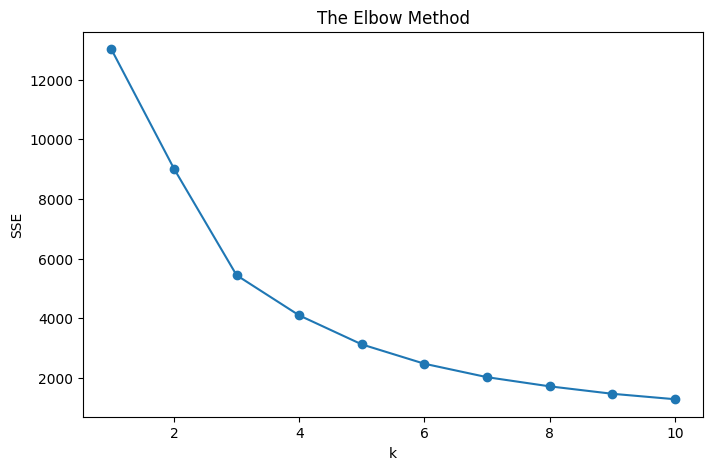

In [187]:
sse = []
k_range = range(1, 11)  # Số cụm từ 1 đến 10

# Chạy thuật toán K-Means cho từng số cụm k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # inertia_ là tổng SSE

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

Silhouette Score for K=2: 0.8959
Silhouette Score for K=3: 0.5943
Silhouette Score for K=4: 0.6161
Silhouette Score for K=5: 0.6157
Silhouette Score for K=6: 0.5983
Silhouette Score for K=7: 0.5193
Silhouette Score for K=8: 0.4768
Silhouette Score for K=9: 0.4907
Silhouette Score for K=10: 0.4782


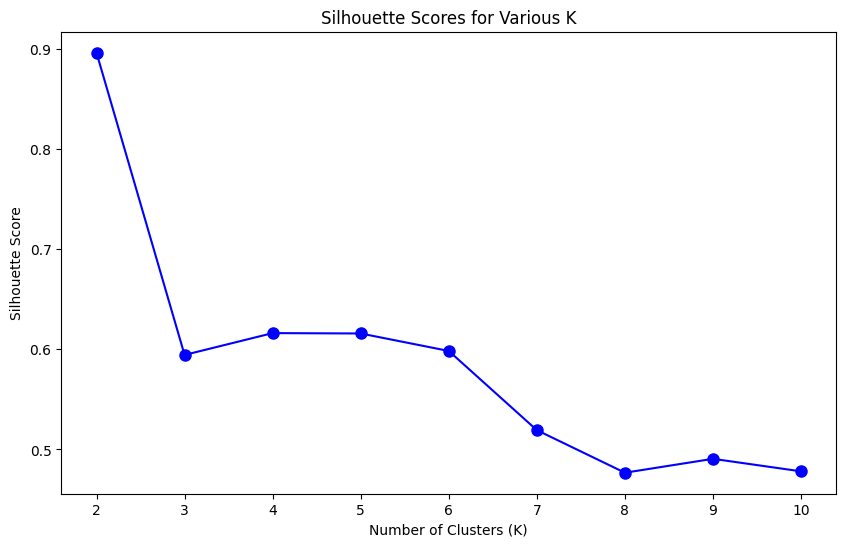

In [188]:
# Silhouette Score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Plotting the Silhouette Scores
plt.figure(figsize=(10,6))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various K')
plt.xticks(K)
plt.show()

In [202]:
# Optimal number of clusters (replace with your choice based on the above analysis)
optimal_k = 4

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=15)

# Fit KMeans and assign cluster labels
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the first few rows with cluster labels
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment,Cluster,Color
0,12346,326,1,77183.60,1,1,5,115,Hibernating,0,yellow
1,12347,2,7,4310.00,5,5,5,555,Champions,3,blue
2,12348,75,4,1797.24,2,4,4,244,At Risk,3,blue
3,12349,19,1,1757.55,4,1,4,414,Promising,3,blue
4,12350,310,1,334.40,1,1,2,112,Hibernating,1,red


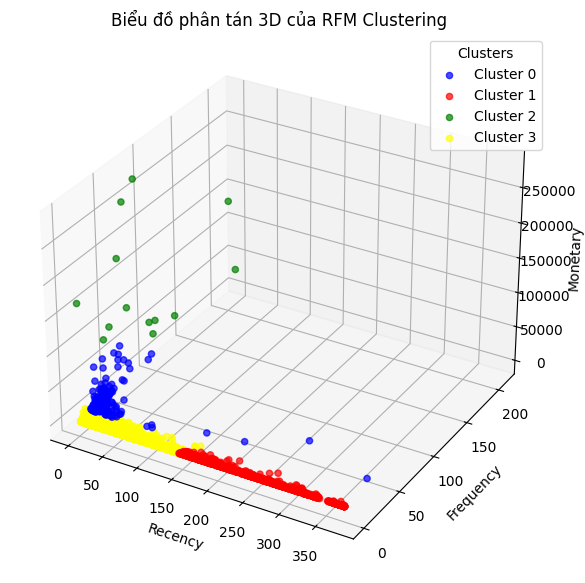

Cluster Distribution:
 Cluster
0     211
1    1062
2      13
3    3053
Name: count, dtype: int64


In [ ]:
# Màu sắc cho các cụm
colors = {0: 'blue', 1: 'red', 2: 'green', 3:'yellow'}
rfm['Color'] = rfm['Cluster'].map(colors)

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10 , 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ từng cụm với màu sắc tương ứng
for cluster in np.unique(rfm['Cluster']):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], 
               label=f"Cluster {cluster}", color=colors[cluster], alpha=0.7)

# Định dạng biểu đồ
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("Biểu đồ phân tán 3D của RFM Clustering")
ax.legend(title="Clusters")

# Hiển thị biểu đồ
plt.show()

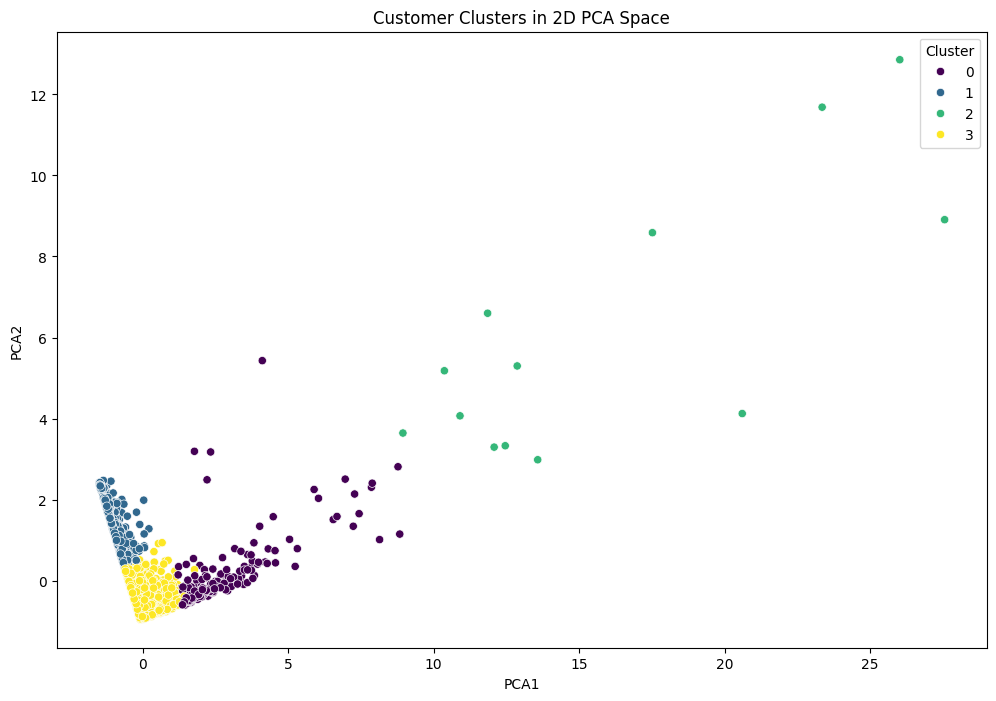

Cluster Distribution:
 Cluster
0     211
1    1062
2      13
3    3053
Name: count, dtype: int64


In [209]:
# ## 7. Cluster Visualization
# PCA for 2D visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=rfm,
    legend='full'
)
plt.title('Customer Clusters in 2D PCA Space')
plt.show()

# Đếm số lượng khách hàng trong từng cụm
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("Cluster Distribution:\n", cluster_counts)

Các cụm khách hàng có sự phân tách rõ ràng

Biểu đồ hiển thị 4 cụm khách hàng (Cluster 0, 1, 2, 3) trên không gian 2D sau khi giảm chiều dữ liệu bằng PCA.

Mỗi màu đại diện cho một nhóm khách hàng có hành vi mua sắm khác nhau.

Các cụm không bị chồng lấn nhiều, cho thấy thuật toán K-Means đã phân cụm tương đối tốt.

Đặc điểm của từng cụm khách hàng

Cluster 0 (Màu tím đậm): Tập trung dày đặc ở góc dưới bên trái, có thể là nhóm khách hàng bình thường, có hoạt động mua sắm vừa phải.

Cluster 1 (Màu xanh dương): Nằm gần Cluster 0, có thể là nhóm khách hàng có mức độ mua hàng tốt hơn một chút so với Cluster 0.

Cluster 2 (Màu xanh lá cây): Trải dài theo trục PCA1, có xu hướng tăng dần. Đây có thể là nhóm khách hàng có giá trị mua hàng cao hơn hoặc tần suất mua

hàng lớn hơn.

Cluster 3 (Màu vàng): Phân bố rời rạc, nằm xa hẳn so với các cụm còn lại. Đây có thể là nhóm khách hàng đặc biệt, chẳng hạn như VIP hoặc những người chi
 
tiêu rất cao.


Mối quan hệ giữa các cụm

Cluster 0 và Cluster 1 nằm gần nhau, có thể là hai nhóm khách hàng phổ thông với mức độ mua sắm khác nhau nhưng không chênh lệch nhiều.

Cluster 2 là nhóm trung gian, với một số khách hàng có mức chi tiêu cao hơn nhóm phổ thông.

Cluster 3 hoàn toàn tách biệt, có thể là khách hàng VIP hoặc có hành vi mua hàng rất khác biệt 

(ví dụ: chi tiêu lớn nhưng ít mua hoặc mua rất thường xuyên với số tiền lớn).

Nhóm Cluster 3 (màu vàng) nên được chăm sóc đặc biệt vì có thể đây là khách hàng VIP, mang lại lợi nhuận cao nhất.

Nhóm Cluster 0 và 1 có thể là khách hàng bình thường, có thể dùng các chương trình khuyến mãi để tăng tần suất mua hàng của họ.

Cluster 2 là nhóm tiềm năng, có thể tập trung vào việc upsell hoặc cross-sell để tăng giá trị mua sắm của họ.